In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2

In [158]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, BatchNormalization, LeakyReLU, PReLU
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger

In [159]:
tf.__version__

'2.0.0-dev20190315'

In [160]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [177]:
n_in = len(X[0])
n_out = len(y[0])
n_hiddens = [200, 200, 200]
p_keep = 0.5
activation = 'relu'
multiclass = 'softmax'
alpha = 0.01

In [178]:
def build_multilayer_perceptron():
    model = Sequential()
    for i, input_dim in enumerate(([n_in] + n_hiddens)[:-1]):
        model.add(Dense(n_hiddens[i], input_dim=input_dim, kernel_initializer='uniform'))
        model.add(PReLU())
        model.add(Dropout(p_keep))

    model.add(Dense(n_out))
    model.add(Activation(multiclass))
    return model

In [179]:
iris = datasets.load_iris()

In [180]:
X = iris.data
y = iris.target

In [181]:
X = preprocessing.scale(X)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [182]:
num_classes = 3
y = tf.keras.utils.to_categorical(y, num_classes)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

/Users/takayoshi-endo/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [184]:
model = build_multilayer_perceptron()

In [185]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [186]:
epochs = 50
batch_size = 200

In [187]:
es = EarlyStopping(monitor='val_loss', patience=10)
csv_logger = CSVLogger('training.log')
hist = model.fit(X_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, csv_logger])

Train on 108 samples, validate on 12 samples
Epoch 1/50
108/108 [==============================] - 0s 4ms/sample - loss: 1.1003 - accuracy: 0.2685 - val_loss: 1.0896 - val_accuracy: 0.9167
Epoch 2/50
108/108 [==============================] - 0s 119us/sample - loss: 1.0917 - accuracy: 0.6019 - val_loss: 1.0796 - val_accuracy: 0.9167
Epoch 3/50
108/108 [==============================] - 0s 122us/sample - loss: 1.0848 - accuracy: 0.7778 - val_loss: 1.0677 - val_accuracy: 0.9167
Epoch 4/50
108/108 [==============================] - 0s 126us/sample - loss: 1.0730 - accuracy: 0.7778 - val_loss: 1.0534 - val_accuracy: 0.9167
Epoch 5/50
108/108 [==============================] - 0s 88us/sample - loss: 1.0576 - accuracy: 0.8704 - val_loss: 1.0351 - val_accuracy: 0.9167
Epoch 6/50
108/108 [==============================] - 0s 146us/sample - loss: 1.0455 - accuracy: 0.7870 - val_loss: 1.0123 - val_accuracy: 0.9167
Epoch 7/50
108/108 [==============================] - 0s 136us/sample - loss: 1.03

In [188]:
score = model.evaluate(X, Y, verbose=0)
model.metrics_names[1]
score[1] * 100

'accuracy'

97.33333587646484

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'acc')

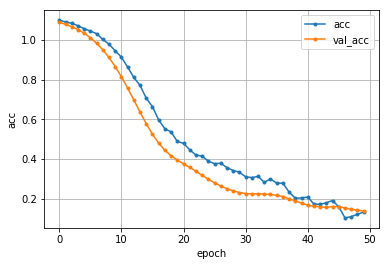

In [189]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


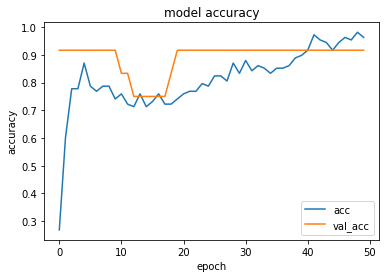

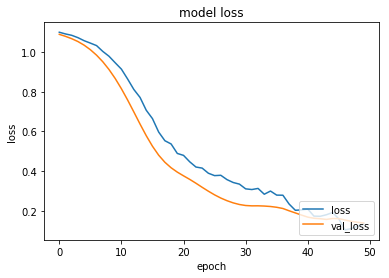

In [190]:
def plot_history(history):
    print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(hist)